In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#removing objects
def clean_data(cl):
    cl.drop(['RowNumber','CustomerId','Surname','Gender','Tenure'],axis=1,inplace=True)
    cl.dropna()
    return cl

In [7]:
clean_data(data)

,CreditScore,Geography,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,0.00,1,1,1,101348.88,1
1,608,Spain,41,83807.86,1,0,1,112542.58,0
2,502,France,42,159660.80,3,1,0,113931.57,1
3,699,France,39,0.00,2,0,0,93826.63,0
4,850,Spain,43,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,France,39,0.00,2,1,0,96270.64,0
9996,516,France,35,57369.61,1,1,1,101699.77,0
9997,709,France,36,0.00,1,0,1,42085.58,1
9998,772,Germany,42,75075.31,2,1,0,92888.52,1


In [8]:
df=pd.DataFrame(data)

In [9]:
#removing the rows which consists of exited value '0' since that customer may not churn
#exited value '1' indicate the customers who may leave or churn the bank
df_exited=df[df['Exited']>0]
print(df_exited)

      CreditScore Geography  Age    Balance  NumOfProducts  HasCrCard  \
0             619    France   42       0.00              1          1   
2             502    France   42  159660.80              3          1   
5             645     Spain   44  113755.78              2          1   
7             376   Germany   29  115046.74              4          1   
16            653   Germany   58  132602.88              1          1   
...           ...       ...  ...        ...            ...        ...   
9981          498   Germany   42  152039.70              1          1   
9982          655   Germany   46  137145.12              1          1   
9991          597    France   53   88381.21              1          1   
9997          709    France   36       0.00              1          0   
9998          772   Germany   42   75075.31              2          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
2                  0       

<Axes: xlabel='IsActiveMember', ylabel='count'>

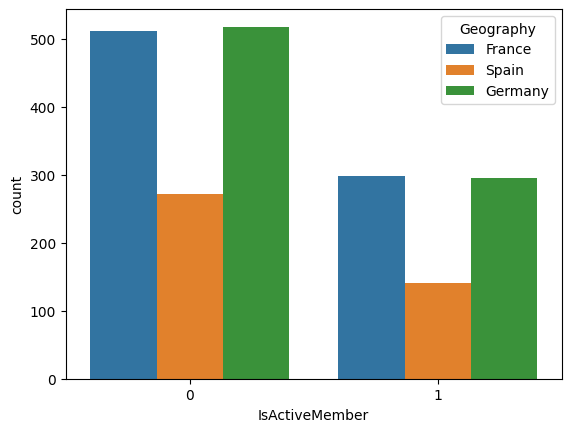

In [10]:
#displaying the customers who may leave or churn with respect to active members with geography
sns.countplot(x = df_exited['IsActiveMember'],hue=df_exited['Geography'])

<Axes: xlabel='IsActiveMember', ylabel='count'>

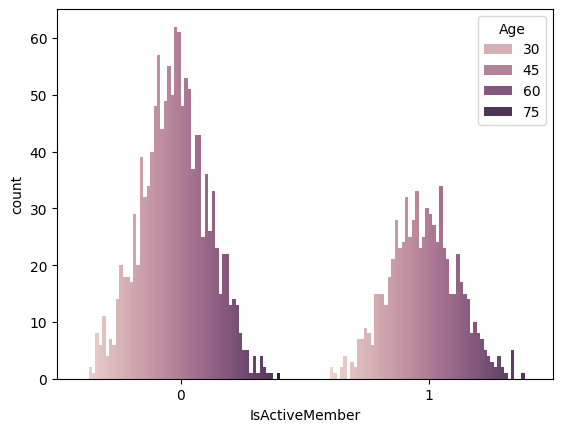

In [11]:
sns.countplot(x = df_exited['IsActiveMember'],hue=df_exited['Age'])

<Axes: xlabel='HasCrCard', ylabel='count'>

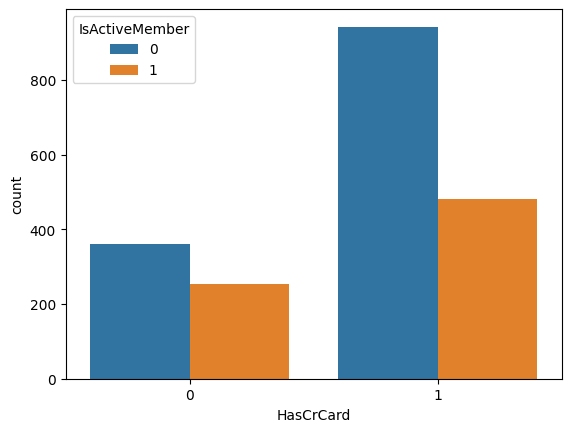

In [12]:
sns.countplot(x = df_exited['HasCrCard'],hue=df_exited['IsActiveMember'])

<Axes: xlabel='CreditScore', ylabel='count'>

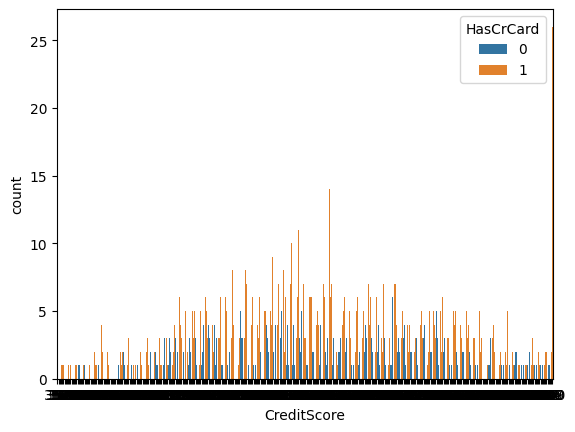

In [13]:
sns.countplot(x = df_exited['CreditScore'],hue=df_exited['HasCrCard'])

In [14]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [15]:
# applying OneHotEncoding on nominal columns and scaling the numerical columns using columns transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    [
        ('ohe',OneHotEncoder(sparse_output=False,drop='first'),['Geography','Age']),
        ('sc',StandardScaler(),['CreditScore','Balance','EstimatedSalary',]),
    ],remainder='passthrough'
)

In [16]:
x_new = ct.fit_transform(x)

In [17]:
# balancing the data as it is imbalanced with the help of smote module
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_new, y)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = cross_val_score(lr,x_res,y_res)

print("Accuracy by Logistic Regression:", np.mean(accuracy)*100)
print(classification_report(y_test, y_pred))

Accuracy by Logistic Regression: 73.46481121783785
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1633
           1       0.73      0.73      0.73      1553

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186



In [20]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = cross_val_score(rf,x_res,y_res)

print("Accuracy by random forest classifier:", np.mean(accuracy)*100)
print(classification_report(y_test, y_pred))

Accuracy by random forest classifier: 90.98398310504848
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1633
           1       0.92      0.91      0.91      1553

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186

